In [1]:
import sys
sys.path.insert(0, "../")
from tmds import *
import os

2.7.12 (default, Nov 12 2018, 14:36:49) 
[GCC 5.4.0 20160609]


In [2]:
s = ["CHA", "SFA-Ctk", "SFA-Pw", "SHA-Ctk", "SHA-Pw", "SRHA"]
cities = ["a", "b", "c", "d", "e"]

In [3]:
elems = "C H O N S".split()

In [4]:
data = []
for i in s:
    data.append([])
    for j in cities:
        data[-1].append(pd.read_csv("data/{}-{}.txt".format(i, j), sep='\t'))
        data[-1][-1] = data[-1][-1][data[-1][-1]["formula"].str.contains("13C", regex=False) != True]
        if "Unnamed: 0" in list(data[-1][-1]):
            data[-1][-1] = data[-1][-1].drop("Unnamed: 0", axis=1)

In [5]:
data[0][0].head()

,peakNo,mw,relativeAbundance,errorPPM,DBE,class,formula,z,C,H,O,N,S
0,1971,361.006966,0.000501,-0.082082,12.0,N1O10,H7_C15_N_O10,0,15,7,10,1,0
1,2172,375.022616,0.000416,-0.079211,12.0,N1O10,H9_C16_N_O10,0,16,9,10,1,0
2,2289,385.007016,0.000757,0.052903,14.0,N1O10,H7_C17_N_O10,0,17,7,10,1,0
3,2311,387.022646,0.000915,0.000760,13.0,N1O10,H9_C17_N_O10,0,17,9,10,1,0
4,2453,399.022606,0.001165,-0.099508,14.0,N1O10,H9_C18_N_O10,0,18,9,10,1,0


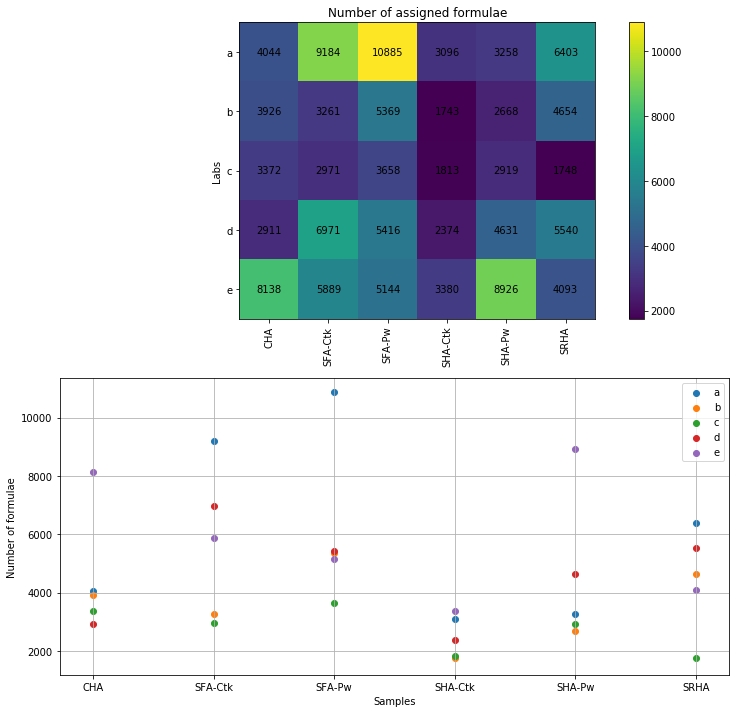

In [18]:
plt.figure(figsize=(12, 12))
counts = []
plt.subplot(211)

plt.title("Number of assigned formulae")
for i in range(6):
    counts.append([])
    for j in range(5):
        counts[-1].append(len(data[i][j]))
        plt.text(i, j, len(data[i][j]), {'ha': 'center', 'va': 'center'})
counts = np.array(counts)
plt.imshow(np.array(counts).T)
plt.yticks(range(5), cities)
plt.xticks(range(6), s, rotation="vertical")
plt.ylabel("Labs")
plt.colorbar()

plt.subplot(212)
plt.ylabel("Number of formulae")
plt.xlabel("Samples")
for i in range(5):
    plt.scatter(range(6), counts[:, i], label=cities[i])
    
plt.xticks(range(6), s)
plt.legend()
plt.grid()
plt.show()

In [39]:
abundance = []
for i in range(6):
    abundance.append([])
    for j in range(5):
        abundance[-1].append(get_dict_of_set(data[i][j], value="relativeAbundance", error="errorPPM"))

In [40]:
error = []
for i in range(6):
    error.append([])
    for j in range(5):
        error[-1].append(get_dict_of_set(data[i][j], value="errorPPM", error="errorPPM"))

In [41]:
mw = []
for i in range(6):
    mw.append([])
    for j in range(5):
        mw[-1].append(get_dict_of_set(data[i][j], value="mw", error="errorPPM"))

In [42]:
tuples = []
for i in range(6):
    tuples.append([])
    for j in range(5):
        tuples[-1].append(get_set_of_tuples_from_np(data[i][j][elems].values))

In [43]:
def get_inter_residues(n, tuples=tuples, shape=(6, 5)):
    tf = []
    for i in range(6):
        tf.append(set([]))
        for j in combinations(range(5), n):
            t = reduce(lambda x, y: x & y, map(lambda x: tuples[i][x], j))
            tf[-1] |= t

    inter = []
    for i in range(6):
        inter.append([])
        for j in range(5):
            inter[-1].append(tf[i] & tuples[i][j])

    residue = []
    for i in range(6):
        residue.append([])
        for j in range(5):
            residue[-1].append(tuples[i][j] - tf[i])
        
    return inter, residue

In [44]:
inter = []
residue = []
for n in range(1, 6):
    i, r = get_inter_residues(n)
    inter.append(i)
    residue.append(r)

In [74]:
inter[4][0][4]

{(15, 7, 6, 1, 0),
 (15, 9, 4, 1, 0),
 (15, 9, 5, 1, 0),
 (15, 9, 6, 1, 0),
 (15, 9, 7, 1, 0),
 (15, 11, 7, 1, 0),
 (16, 7, 6, 1, 0),
 (16, 9, 4, 1, 0),
 (16, 9, 5, 1, 0),
 (16, 9, 7, 1, 0),
 (16, 11, 6, 1, 0),
 (16, 11, 7, 1, 0),
 (16, 12, 8, 0, 0),
 (16, 12, 9, 0, 0),
 (16, 16, 7, 0, 0),
 (17, 7, 5, 1, 0),
 (17, 7, 6, 1, 0),
 (17, 7, 7, 1, 0),
 (17, 7, 8, 1, 0),
 (17, 8, 5, 2, 0),
 (17, 8, 6, 2, 0),
 (17, 9, 4, 1, 0),
 (17, 9, 5, 1, 0),
 (17, 9, 6, 1, 0),
 (17, 9, 7, 1, 0),
 (17, 11, 5, 1, 0),
 (17, 11, 6, 1, 0),
 (17, 12, 9, 0, 0),
 (17, 13, 5, 1, 0),
 (17, 13, 8, 1, 0),
 (17, 14, 8, 0, 0),
 (17, 16, 7, 0, 0),
 (18, 7, 5, 1, 0),
 (18, 7, 6, 1, 0),
 (18, 7, 7, 1, 0),
 (18, 8, 5, 2, 0),
 (18, 8, 6, 2, 0),
 (18, 8, 7, 2, 0),
 (18, 9, 4, 1, 0),
 (18, 9, 5, 1, 0),
 (18, 9, 6, 1, 0),
 (18, 9, 7, 1, 0),
 (18, 9, 8, 1, 0),
 (18, 10, 6, 2, 0),
 (18, 11, 4, 1, 0),
 (18, 11, 5, 1, 0),
 (18, 11, 6, 1, 0),
 (18, 11, 7, 1, 0),
 (18, 12, 10, 0, 0),
 (18, 12, 11, 0, 0),
 (18, 13, 5, 1, 0),
 (18, 13

In [94]:
max_inter = []
for i in range(6):
    max_inter.append([])
    for j in range(5):
        max_inter[-1].append({})
        
for k in range(5):
    for i in range(6):
        for j in range(5):
            for t in inter[k][i][j]:
                max_inter[i][j][t] = k + 1

In [97]:
st = "exp\ttown\tabundance\tmw\terror\tC\tH\tO\tN\tS\ty\n"
for i in range(6):
    for j in range(5):
        I = list(map(lambda x: abundance[i][j][x], tuples[i][j]))        
        E = list(map(lambda x: error[i][j][x], tuples[i][j]))
        M = list(map(lambda x: mw[i][j][x], tuples[i][j]))
        F = list(map(lambda x: x, tuples[i][j]))
        Y = list(map(lambda x: max_inter[i][j][x], tuples[i][j]))
        for ii, e, m, f, y in zip(I, E, M, F, Y):
            t = '\t'.join(map(lambda x: str(x), f))
            #st += f"{s[i]}\t{cities[j]}\t{ii}\t{m}\t{e}\t{t}\t{1}\n"
            st += "{}\t{}\t{}\t{}\t{}\t{}\t{}\n".format(s[i], cities[j], ii, m, e, t, y)
            

In [98]:
with open("data.csv", "w") as f:
    f.write(st)